Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos solicitados y la distribución real de puntos. Para esto considere que:
● El polinomio que debe usar es 2 * x**3 - 3 * x**2 + 5 * x + 3
● Considere el uso de np.polyval
● Considere el uso de np.polyder
● Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método fue más rápido y por qué.
● Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De esto mencione cuál método lo hizo mejor y por qué

Coeficientes de gradiente descendiente: [ 4.39867328 -1.91704647  3.10146346 -0.19715811]
Tiempo de ejecución: 0.0546 segundos
Coeficientes de gradiente descendiente estocástica: [ 2.67685911 -3.95593006  6.82081822  2.66695071]
Tiempo de ejecución: 1.0379 segundos
Mini batches: [ 3.47060658 -3.86423224  5.15787058  2.52776735]
Timepo de ejecución: 0.3393 segundos


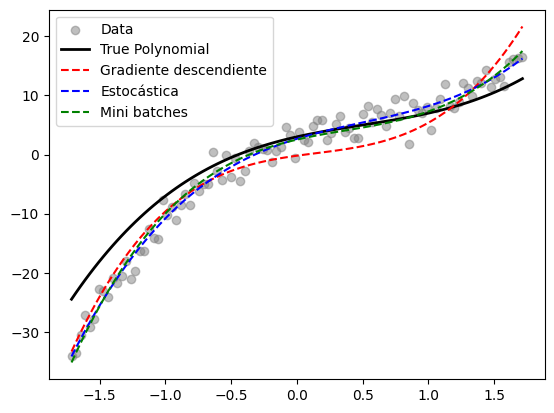

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

np.random.seed(42)
x_data = np.linspace(-2, 2, 100) 
y_data = np.polyval(np.array([2, -3, 5, 3]), x_data) + np.random.normal(scale=2, size=x_data.shape) 

x_data = (x_data - np.mean(x_data)) / np.std(x_data)

# Gradiente descendiente

start = time.time()
coeffs = np.random.randn(4) 

for _ in range(1000):
    y_pred = np.polyval(coeffs, x_data)
    residuals = y_pred - y_data

    gradients = np.zeros_like(coeffs)
    for i in range(len(coeffs)):
        gradients[i] = np.mean(residuals * (x_data ** (3 - i)))

    coeffs -= 1e-3 * gradients

bgd_coeffs = coeffs
bgd_time = time.time() - start

# Estocástico
start = time.time()
coeffs = np.random.randn(4) 

for _ in range(1000):
    for i in range(len(x_data)):
        xi, yi = x_data[i], y_data[i]
        y_pred = np.polyval(coeffs, xi)
        residual = y_pred - yi

        gradients = np.array([residual * (xi ** (3 - j)) for j in range(4)])

        coeffs -= 1e-3 * gradients

sgd_coeffs = coeffs
sgd_time = time.time() - start

# Mini batches

start = time.time()
coeffs = np.random.randn(4)

for _ in range(1000):
    indices = np.random.permutation(len(x_data)) 
    for i in range(0, len(x_data), 10):
        X_batch = x_data[i:i + 10]
        y_batch = y_data[i:i + 10]

        y_pred = np.polyval(coeffs, X_batch)
        residuals = y_pred - y_batch

        gradients = np.zeros_like(coeffs)
        for j in range(len(coeffs)):
            gradients[j] = np.mean(residuals * (X_batch ** (3 - j)))

        coeffs -= 1e-3 * gradients

mbgd_coeffs = coeffs
mbgd_time = time.time() - start

print(f"Coeficientes de gradiente descendiente: {bgd_coeffs}")
print(f"Tiempo de ejecución: {bgd_time:.4f} segundos")
print(f"Coeficientes de gradiente descendiente estocástica: {sgd_coeffs}")
print(f"Tiempo de ejecución: {sgd_time:.4f} segundos")
print(f"Mini batches: {mbgd_coeffs}")
print(f"Timepo de ejecución: {mbgd_time:.4f} segundos")

# Gráfica
plt.scatter(x_data, y_data, label="Data", color="gray", alpha=0.5)

x_range = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_range, np.polyval(np.array([2, -3, 5, 3]), x_range), label="True Polynomial", color="black", linewidth=2)
plt.plot(x_range, np.polyval(bgd_coeffs, x_range), label="Gradiente descendiente", linestyle="dashed", color="red")
plt.plot(x_range, np.polyval(sgd_coeffs, x_range), label="Estocástica", linestyle="dashed", color="blue")
plt.plot(x_range, np.polyval(mbgd_coeffs, x_range), label="Mini batches", linestyle="dashed", color="green")

plt.legend()
plt.show()


Gradiente estocástico: 1.0806s
Descenso de gradiente: 0.0611s
Descenso de gradiente por mini batches: 0.3544s

El Descenso de gradiente fue el más rápido, mientras que el Gradiente estocástico fue el más lento.

Esto es debido a que el descenso de gradiente actualiza los coeficientes una vez por época para todo el data set, mientras que el estocástico los actualiza por cada data point. Mientras, el mini batches los actualiza por pequeños batches. El beneficio de actualizar los coeficientes una menor cantidad de veces es que lo hace más estable y rápido. En cambio, como en el estocástico, actualizarlos cada data point requiere más iteraciones.

-----------------------------------------------------------------------

El descenso en gradiente, en rojo, tiene un overfit pequeño y se desvía del true polynomial. El estocástico sigue el trend general. El mini batches sigue el true polynomial de cerca, lo cual podría decirse que es la mejor aproximación. Mini batches se beneficia de estabilidad y adaptabilidad y no es tan sensitivo a data points.

Implemente un perceptrón de una sola capa para realizar una clasificación binaria del dataset de Iris(incluido en sklearn.datasets.load_iris). Visualice la frontera de decisión que fue aprendida por el perceptrón.
Recuerde que:
● Debe cargar el dataset de Iris desde la librería mencionada
● Use solamente dos features, siendo estos sepal length y sepal width
● Asegúrese de que su clase Perceptron tenga los métodos de fit y predict
● Visualice la frontera de decisión
○ El eje Y debería ser sepal width y el eje X debería ser sepal length
● Debe definir una métrica de desempeño y justificar el por qué de esta métrica. Con dicha métrica, evalúe el rendimiento de su modelo. Es decir, diga si lo hizo bien o no y el por qué.

Perceptron Accuracy: 1.00


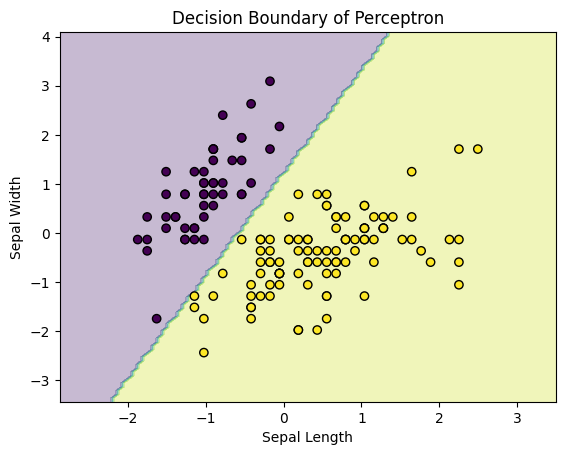

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = (iris.target != 0).astype(int)  # Clasificación binaria

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

perceptron = Perceptron()
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy:.2f}")


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Decision Boundary of Perceptron")
plt.show()


Se utilizó accuracy debido a que el dataset estaba balanceado, por lo que el accuracy era la métrica más relevante en este problema.

El perceptrón tuvo un excelente desempeño a la hora de clasificar las dos clases y, a pesar de que el accuracy es perfecto, no hay problemas de overfitting porque el dataset que provee iris está balanceado. Sin embargo, lo más seguro es que si se fuera a probar con data nueva, el accuracy bajaría ya que se entrenó y se probó con el mismo dataset y puede tener problemas con ruido.